<a href="https://colab.research.google.com/github/MB9920/Personal_Diary_App/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre working on Data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
matches = pd.read_csv('/content/drive/MyDrive/matches.csv')
deliveries= pd.read_csv('/content/drive/MyDrive/deliveries.csv')

In [36]:
matches = matches.rename(columns={'id':'match_id'})

In [37]:
final_data = pd.merge(deliveries,matches,how='left',on='match_id')
final_data['year'] = final_data['date'].str[-4:].astype('int')
final_data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon,2024
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon,2024
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon,2024
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon,2024


# working for Analysis for Batsman

In [38]:
batsman_run_year_wise = final_data.groupby(['batter','year']).agg({'batsman_runs':'sum'}).reset_index()
pivot = batsman_run_year_wise.pivot_table(index='batter',columns='year',values='batsman_runs',fill_value=0)
pivot

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
batter,,,,,,,,,,,,,,,,,
A Ashish Reddy,0.0,0.0,0.0,0.0,35.0,125.0,0.0,73.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Badoni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,238.0,235.0
A Chandila,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Chopra,42.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Choudhary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yashpal Singh,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Younis Khan,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yudhvir Singh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0


In [39]:
# to extract conditions divided the years into three
current_year = int(pivot.columns.max())
last_three_years=[y for y in range(current_year-2,current_year+1) if y in pivot.columns]
years_before_the_last_three_years = [y for y in pivot.columns if isinstance (y,(int,float)) and y < (current_year-2)]

In [40]:
group1_mask=(pivot.loc[:,last_three_years].sum(axis=1)==0)
retired_batsman = pivot[group1_mask]
retired_batsman.index

Index(['A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary',
       'A Dananjaya', 'A Flintoff', 'A Kumble', 'A Mithun', 'A Mukund',
       'A Nehra',
       ...
       'Y Prithvi Raj', 'Y Venugopal Rao', 'YA Abdulla', 'YK Pathan',
       'YV Takawale', 'Yash Dayal', 'Yashpal Singh', 'Younis Khan',
       'Yuvraj Singh', 'Z Khan'],
      dtype='object', name='batter', length=407)

In [41]:
if years_before_the_last_three_years:
  no_runs_before_mask = (pivot.loc[:,years_before_the_last_three_years].sum(axis=1)==0)
else:
  no_runs_before_mask = pd.Series(True, index=pivot.index)

has_runs_in_last_three_years = (pivot.loc[:,last_three_years].sum(axis=1)>0)
group2_mask = no_runs_before_mask & has_runs_in_last_three_years

early_debut_batsman = pivot[group2_mask]
early_debut_batsman.index

Index(['A Badoni', 'A Kamboj', 'A Manohar', 'A Raghuvanshi', 'A Tomar',
       'AA Kulkarni', 'AJ Hosein', 'AS Roy', 'AU Rashid', 'Abdul Basith',
       ...
       'Tanush Kotian', 'Tilak Varma', 'Umran Malik', 'V Viyaskanth',
       'VG Arora', 'Vijaykumar Vyshak', 'Vivrant Sharma', 'WG Jacks',
       'YV Dhull', 'Yudhvir Singh'],
      dtype='object', name='batter', length=108)

In [42]:
pivot = pivot.reindex(sorted(pivot.columns),axis=1)
earliest_year = pivot.columns.min()
latest_year = pivot.columns.max()
runs = pivot.fillna(0)

def first_year_runs(row):
  nonzero=row[row>0]
  return int(nonzero.index.min()) if len(nonzero)>0 else None

def last_years_with_runs(row):
  nonzero=row[row>0]
  return nonzero.index.max() if len(nonzero)>0 else None

first_years = runs.apply(first_year_runs,axis=1)
last_years = runs.apply(last_years_with_runs,axis=1)

group_3_mask = (first_years==earliest_year) & (last_years==latest_year)
expereinced_batsman = pivot[group_3_mask]
expereinced_batsman.index

Index(['AM Rahane', 'I Sharma', 'KD Karthik', 'MK Pandey', 'MS Dhoni',
       'PP Chawla', 'RA Jadeja', 'RG Sharma', 'S Dhawan', 'V Kohli',
       'WP Saha'],
      dtype='object', name='batter')

In [43]:
debut_min_year = 2009
debut_max_year = current_year
active_batsman_selection = (
    (first_years >= debut_min_year) &
    (first_years <= debut_max_year) &
    (last_years == latest_year) &
    ~(pivot.index.isin(early_debut_batsman)) &
    ~(pivot.index.isin(expereinced_batsman)) &
    ~(pivot.index.isin(retired_batsman.index))
)

active_batsman = pivot[active_batsman_selection]
active_batsman.index

Index(['A Badoni', 'A Kamboj', 'A Manohar', 'A Nortje', 'A Raghuvanshi',
       'AA Kulkarni', 'AD Russell', 'AJ Turner', 'AK Markram', 'AR Patel',
       ...
       'Tilak Varma', 'UT Yadav', 'V Shankar', 'V Viyaskanth', 'VG Arora',
       'VR Iyer', 'Vijaykumar Vyshak', 'WG Jacks', 'YBK Jaiswal',
       'Yudhvir Singh'],
      dtype='object', name='batter', length=157)

In [44]:
debut_batsman = early_debut_batsman.index.to_list()
active_batsman = active_batsman.index.to_list()
expereinced_batsman = expereinced_batsman.index.to_list()

# Analysis for Batsman

*   Batsman who have done Early Debut i.e. (2022 - 2024 with no prior runs)
*   Batsman who are Active i.e  (with prior runs within 2009 - 2024)
*   Batsman who are Experienced i.e. (batsman how are playing from the beigning)

In [45]:
# top 5 batsman in overs from 1st to 6th over for active_batsman
top_5_batsman_in_power_play_A= final_data[(final_data['batter'].isin(active_batsman))&(final_data['over']<7)].groupby('batter').agg(
    {
        'batsman_runs':'sum'
        }
    ).sort_values(by='batsman_runs', ascending=False).head(10).reset_index()


# top 5 batsman in overs from 1st to 6th over for debut_batsman
top_5_batsman_in_power_play_D=final_data[(final_data['batter'].isin(debut_batsman))&(final_data['over']<7)].groupby('batter').agg(
    {
        'batsman_runs':'sum'
        }
    ).sort_values(by='batsman_runs', ascending=False).head(10).reset_index()


# top 5 batsman in overs from 1st to 6th over for experinced_batsman
top_5_batsman_in_power_play_E =final_data[(final_data['batter'].isin(expereinced_batsman))&(final_data['over']<7)].groupby('batter').agg(
    {
        'batsman_runs':'sum'
        }
    ).sort_values(by='batsman_runs', ascending=False).head(10).reset_index()

In [46]:
# top 5 batsman in overs from 7th to 18th over for active_batsman
top_5_batsman_in_mid_game_A =final_data[(final_data['batter'].isin(active_batsman))&(final_data['over']>7)&(final_data['over']<18)].groupby('batter').agg(
    {
        'batsman_runs':'sum'
        }
    ).sort_values(by='batsman_runs', ascending=False).head(10).reset_index()


# top 5 batsman in overs from 7th to 18th over for experinced_batsman
top_5_batsman_in_mid_game_E =final_data[(final_data['batter'].isin(expereinced_batsman))&(final_data['over']>7)&(final_data['over']<18)].groupby('batter').agg(
    {
        'batsman_runs':'sum'
        }
    ).sort_values(by='batsman_runs', ascending=False).head(10).reset_index()


# top 5 batsman in overs from 7th to 18th over for debut_batsman
top_5_batsman_in_mid_game_D =final_data[(final_data['batter'].isin(debut_batsman))&(final_data['over']>7)&(final_data['over']<18)].groupby('batter').agg(
    {
        'batsman_runs':'sum'
        }
    ).sort_values(by='batsman_runs', ascending=False).head(10).reset_index()

In [47]:
# top 5 batsman in overs from 18th to 20th over for active_batsman
top_5_batsman_in_end_game_A =final_data[(final_data['batter'].isin(active_batsman))&(final_data['over']>=18)].groupby('batter').agg(
    {
        'batsman_runs':'sum'
        }
    ).sort_values(by='batsman_runs', ascending=False).head(10).reset_index()


# top 5 batsman in overs from 18th to 20th over for debut_batsman
top_5_batsman_in_end_game_D =final_data[(final_data['batter'].isin(debut_batsman))&(final_data['over']>=18)].groupby('batter').agg(
    {
        'batsman_runs':'sum'
        }
    ).sort_values(by='batsman_runs', ascending=False).head(10).reset_index()


# top 5 batsman in overs from 18th to 20th over for expereinced_batsman
top_5_batsman_in_end_game_E =final_data[(final_data['batter'].isin(expereinced_batsman))&(final_data['over']>=18)].groupby('batter').agg(
    {
        'batsman_runs':'sum'
        }
    ).sort_values(by='batsman_runs', ascending=False).head(10).reset_index()

In [48]:
# batsman in super_over for active_batsman
batsman_in_super_over_A =final_data[(final_data['batter'].isin(active_batsman))&(final_data['inning']>2)].groupby('batter').agg(
    {
        'batsman_runs':'sum'
        }
    ).sort_values(by='batsman_runs', ascending=False).reset_index()


# batsman in super_over for expereinced_batsman
batsman_in_super_over_E =final_data[(final_data['batter'].isin(expereinced_batsman))&(final_data['inning']>2)].groupby('batter').agg(
    {
        'batsman_runs':'sum'
        }
    ).sort_values(by='batsman_runs', ascending=False).reset_index()

In [49]:
# Active batsman becoming player of the match
top_5_mom_active_batsman =final_data[(final_data['batter']==final_data['player_of_match'])&(final_data['batter'].isin(active_batsman))].groupby('batter').agg(
    {
        'player_of_match':'count'
        }).sort_values(by='player_of_match', ascending=False).reset_index().head(10)

# Early debuts batsman becoming player of the match
top_5_mom_debut_batsman =final_data[(final_data['batter']==final_data['player_of_match'])&(final_data['batter'].isin(debut_batsman))].groupby('batter').agg(
    {
        'player_of_match':'count'
        }).sort_values(by='player_of_match', ascending=False).reset_index().head(10)

# Expereinced batsman becoming player of the match
top_5_mom_exp_batsman =final_data[(final_data['batter']==final_data['player_of_match'])&(final_data['batter'].isin(expereinced_batsman))].groupby('batter').agg(
    {
        'player_of_match':'count'
        }).sort_values(by='player_of_match', ascending=False).reset_index().head(10)

 # visualisation for Batsman

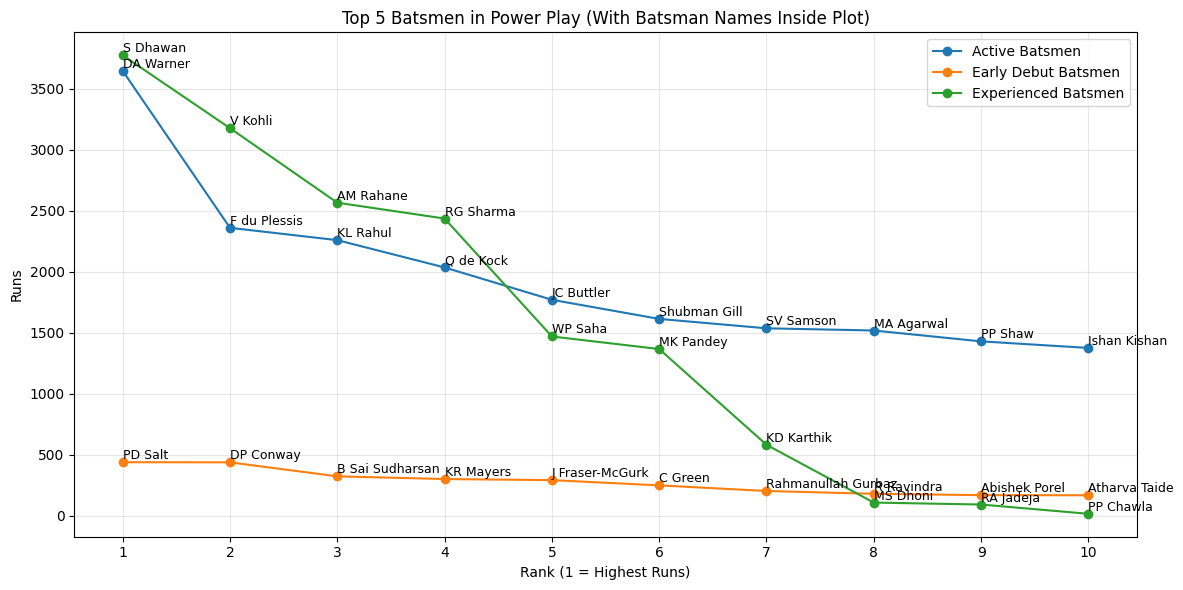

In [67]:
def label_points(ax, x, y, labels):
    for i in range(len(x)):
        ax.text(x[i], y[i], labels[i], fontsize=9, ha='left', va='bottom')

plt.figure(figsize=(12,6))

# Create rank positions 1–5
A = top_5_batsman_in_power_play_A.copy()
D = top_5_batsman_in_power_play_D.copy()
E = top_5_batsman_in_power_play_E.copy()

A['rank'] = range(1, len(A)+1)
D['rank'] = range(1, len(D)+1)
E['rank'] = range(1, len(E)+1)

# Plot the lines
plt.plot(A['rank'], A['batsman_runs'], marker='o', label='Active Batsmen')
plt.plot(D['rank'], D['batsman_runs'], marker='o', label='Early Debut Batsmen')
plt.plot(E['rank'], E['batsman_runs'], marker='o', label='Experienced Batsmen')

# Add batsman names as labels next to each point
ax = plt.gca()
label_points(ax, A['rank'], A['batsman_runs'], A['batter'])
label_points(ax, D['rank'], D['batsman_runs'], D['batter'])
label_points(ax, E['rank'], E['batsman_runs'], E['batter'])

plt.title('Top 5 Batsmen in Power Play (With Batsman Names Inside Plot)')
plt.xlabel('Rank (1 = Highest Runs)')
plt.ylabel('Runs')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

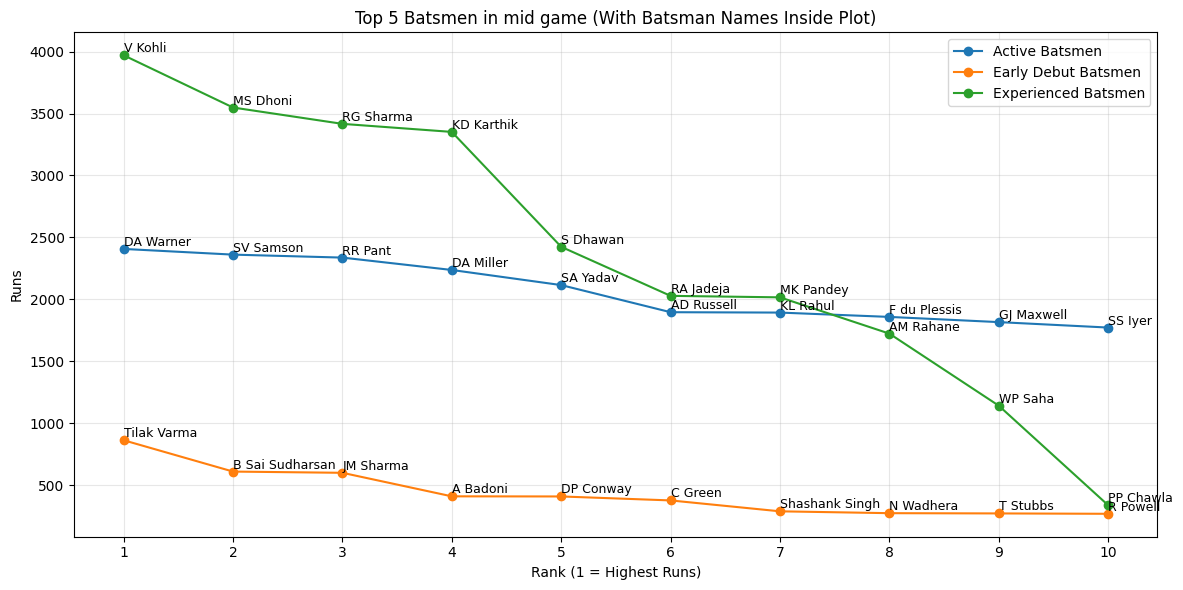

In [68]:
def label_points(ax, x, y, labels):
    for i in range(len(x)):
        ax.text(x[i], y[i], labels[i], fontsize=9, ha='left', va='bottom')

plt.figure(figsize=(12,6))

# Create rank positions 1–5
A = top_5_batsman_in_mid_game_A.copy()
D = top_5_batsman_in_mid_game_D.copy()
E = top_5_batsman_in_mid_game_E.copy()

A['rank'] = range(1, len(A)+1)
D['rank'] = range(1, len(D)+1)
E['rank'] = range(1, len(E)+1)

# Plot the lines
plt.plot(A['rank'], A['batsman_runs'], marker='o', label='Active Batsmen')
plt.plot(D['rank'], D['batsman_runs'], marker='o', label='Early Debut Batsmen')
plt.plot(E['rank'], E['batsman_runs'], marker='o', label='Experienced Batsmen')

# Add batsman names as labels next to each point
ax = plt.gca()
label_points(ax, A['rank'], A['batsman_runs'], A['batter'])
label_points(ax, D['rank'], D['batsman_runs'], D['batter'])
label_points(ax, E['rank'], E['batsman_runs'], E['batter'])

plt.title('Top 5 Batsmen in mid game (With Batsman Names Inside Plot)')
plt.xlabel('Rank (1 = Highest Runs)')
plt.ylabel('Runs')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

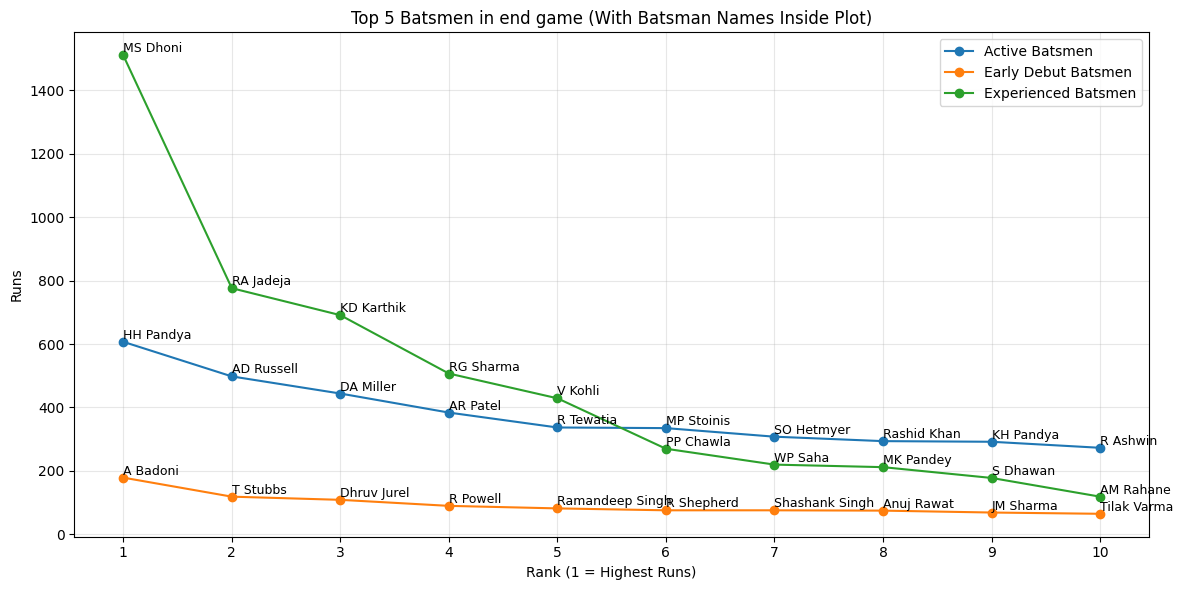

In [69]:
def label_points(ax, x, y, labels):
    for i in range(len(x)):
        ax.text(x[i], y[i], labels[i], fontsize=9, ha='left', va='bottom')

plt.figure(figsize=(12,6))

# Create rank positions 1–5
A = top_5_batsman_in_end_game_A.copy()
D = top_5_batsman_in_end_game_D.copy()
E = top_5_batsman_in_end_game_E.copy()

A['rank'] = range(1, len(A)+1)
D['rank'] = range(1, len(D)+1)
E['rank'] = range(1, len(E)+1)

# Plot the lines
plt.plot(A['rank'], A['batsman_runs'], marker='o', label='Active Batsmen')
plt.plot(D['rank'], D['batsman_runs'], marker='o', label='Early Debut Batsmen')
plt.plot(E['rank'], E['batsman_runs'], marker='o', label='Experienced Batsmen')

# Add batsman names as labels next to each point
ax = plt.gca()
label_points(ax, A['rank'], A['batsman_runs'], A['batter'])
label_points(ax, D['rank'], D['batsman_runs'], D['batter'])
label_points(ax, E['rank'], E['batsman_runs'], E['batter'])

plt.title('Top 5 Batsmen in end game (With Batsman Names Inside Plot)')
plt.xlabel('Rank (1 = Highest Runs)')
plt.ylabel('Runs')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

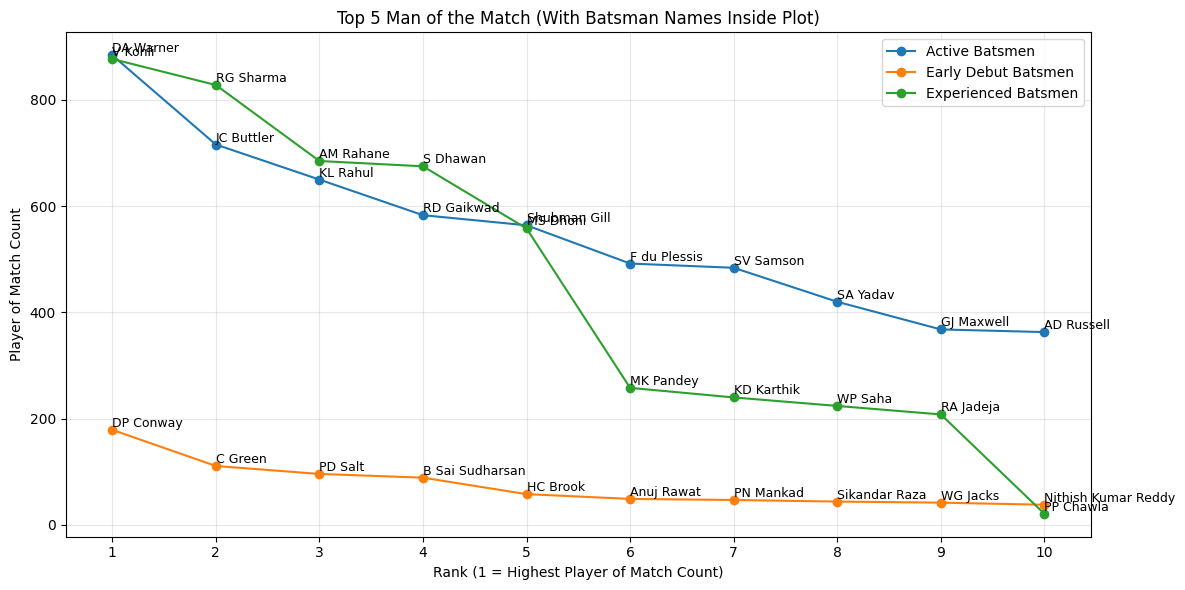

In [70]:
def label_points(ax, x, y, labels):
    for i in range(len(x)):
        ax.text(x[i], y[i], labels[i], fontsize=9, ha='left', va='bottom')

plt.figure(figsize=(12,6))

# Create rank positions 1–5
A = top_5_mom_active_batsman.copy()
D = top_5_mom_debut_batsman.copy()
E = top_5_mom_exp_batsman.copy()

A['rank'] = range(1, len(A)+1)
D['rank'] = range(1, len(D)+1)
E['rank'] = range(1, len(E)+1)

# Plot the lines
plt.plot(A['rank'], A['player_of_match'], marker='o', label='Active Batsmen')
plt.plot(D['rank'], D['player_of_match'], marker='o', label='Early Debut Batsmen')
plt.plot(E['rank'], E['player_of_match'], marker='o', label='Experienced Batsmen')

# Add batsman names as labels next to each point
ax = plt.gca()
label_points(ax, A['rank'], A['player_of_match'], A['batter'])
label_points(ax, D['rank'], D['player_of_match'], D['batter'])
label_points(ax, E['rank'], E['player_of_match'], E['batter'])

plt.title('Top 5 Man of the Match (With Batsman Names Inside Plot)')
plt.xlabel('Rank (1 = Highest Player of Match Count)')
plt.ylabel('Player of Match Count')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Working for Analysis for Bowler

In [54]:
bowler_wck_year_wise = final_data.groupby(['bowler','year']).agg({'is_wicket':'sum'}).reset_index()
pivot1 = bowler_wck_year_wise.pivot_table(index='bowler',columns='year',values='is_wicket',fill_value=0)
pivot1

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
bowler,,,,,,,,,,,,,,,,,
A Ashish Reddy,0.0,0.0,0.0,0.0,11.0,3.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Badoni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
A Chandila,0.0,0.0,0.0,0.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Choudhary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Dananjaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,2.0,16.0
Yash Thakur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0
Yudhvir Singh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0


In [55]:
# to extract conditions divided the years into three
current_year_b = int(pivot1.columns.max())
last_three_years_b=[y for y in range(current_year_b-2,current_year+1) if y in pivot1.columns]
years_before_the_last_three_years_b = [y for y in pivot1.columns if isinstance (y,(int,float)) and y < (current_year_b-2)]

In [56]:
group1_mask_b=(pivot.loc[:,last_three_years].sum(axis=1)==0)
retired_bowler = pivot[group1_mask_b]

In [57]:
if years_before_the_last_three_years_b:
  no_runs_before_mask_b = (pivot1.loc[:,years_before_the_last_three_years_b].sum(axis=1)==0)
else:
  no_runs_before_mask_b = pd.Series(True, index=pivot1.index)

has_runs_in_last_three_years_b = (pivot1.loc[:,last_three_years_b].sum(axis=1)>0)
group2_mask_b = no_runs_before_mask_b & has_runs_in_last_three_years_b

early_debut_bowler = pivot1[group2_mask_b]

In [58]:
pivot1 = pivot1.reindex(sorted(pivot1.columns),axis=1)
earliest_year_b = pivot1.columns.min()
latest_year_b = pivot1.columns.max()
is_wicket = pivot1.fillna(0)

def first_year_is_wicket(row):
  nonzero=row[row>0]
  return int(nonzero.index.min()) if len(nonzero)>0 else None

def last_years_with_is_wicket(row):
  nonzero=row[row>0]
  return nonzero.index.max() if len(nonzero)>0 else None

first_years_b = is_wicket.apply(first_year_runs,axis=1)
last_years_b = is_wicket.apply(last_years_with_runs,axis=1)

group_3_mask_b = (first_years_b==earliest_year_b) & (last_years_b==latest_year_b)
expereinced_bowler = pivot1[group_3_mask_b]

In [59]:
debut_min_year = 2015
debut_max_year = current_year
active_bowler = (
    (first_years_b >= debut_min_year) &
    (first_years_b <= debut_max_year) &
    (last_years_b == latest_year_b) &
    ~(pivot1.index.isin(early_debut_bowler)) &
    ~(pivot1.index.isin(expereinced_bowler)) &
    ~(pivot1.index.isin(retired_bowler))
)

active_bowler = pivot1[active_bowler]

In [60]:
early_debut_bowler = early_debut_bowler.index.to_list()
expereinced_bowler = expereinced_bowler.index.to_list()
active_bowler = active_bowler.index.to_list()

# Analysis for Bowler


*   Bowler who have done Early Debut i.e. (2022 - 2024 with no prior wicket)
*   Bowler who are Active i.e  (with prior wicket within 2009 - 2024)
*   Bowler who are Experienced i.e. (bowlers how are playing from the beigning)

In [61]:
# top 5 bowlers in overs from 1st to 6th over for experienced_bowler
top_5_bowlwer_in_power_plays_E= final_data[
                                            (final_data['bowler'].isin(expereinced_bowler))&(final_data['over']<7)
                                            ].groupby('bowler').agg(
                                                                    {
                                                                      'is_wicket':'sum'
                                                                     }
                                                                    ).sort_values(by='is_wicket', ascending=False).reset_index().head(10)

# top 5 bowlers in overs from 1st to 6th over for active_bowler
top_5_bowlwer_in_power_plays_A= final_data[
                                            (final_data['bowler'].isin(active_bowler))&(final_data['over']<7)
                                            ].groupby('bowler').agg(
                                                                    {
                                                                      'is_wicket':'sum'
                                                                      }
                                                                    ).sort_values(by='is_wicket', ascending=False).reset_index().head(10)

# top 5 bowlers in overs from 1st to 6th over for debut_bowler
top_5_bowlwer_in_power_plays_D= final_data[
                                            (final_data['bowler'].isin(early_debut_bowler))&(final_data['over']<7)
                                            ].groupby('bowler').agg(
                                                                    {
                                                                      'is_wicket':'sum'
                                                                     }
                                                                    ).sort_values(by='is_wicket', ascending=False).reset_index().head(10)

In [62]:
# top 5 bowlers in overs from 7th to 18th over for debut_bowler
top_5_bowlwer_in_mid_game_D= final_data[
                                        (final_data['bowler'].isin(early_debut_bowler))&((final_data['over']>=7)|(final_data['over']<18))
                                        ].groupby('bowler').agg(
                                                                {
                                                                  'is_wicket':'sum'
                                                                  }
                                                                ).sort_values(by='is_wicket', ascending=False).reset_index().head(10)

# top 5 bowlers in overs from 7th to 18th over for experienced_bowler
top_5_bowlwer_in_mid_game_E= final_data[
                                        (final_data['bowler'].isin(expereinced_bowler))&((final_data['over']>=7)|(final_data['over']<18))
                                      ].groupby('bowler').agg(
                                                              {
                                                                'is_wicket':'sum'
                                                              }
                                                              ).sort_values(by='is_wicket', ascending=False).reset_index().head(10)

# top 5 bowlers in overs from 7th to 18th over for active_bowler
top_5_bowlwer_in_mid_game_A= final_data[
                                        (final_data['bowler'].isin(active_bowler))&((final_data['over']>=7)|(final_data['over']<18))
                                      ].groupby('bowler').agg(
                                                              {
                                                               'is_wicket':'sum'
                                                              }
                                                              ).sort_values(by='is_wicket', ascending=False).reset_index().head(10)

In [63]:
# top 5 bowler in overs from 18th to 20th over for expereinced_bowler
top_5_bowlwer_in_end_game_E =final_data[
                                        (final_data['bowler'].isin(expereinced_batsman))&(final_data['over']>=18)
                                        ].groupby('bowler').agg(
                                                                {
                                                                  'is_wicket':'sum'
                                                                }
                                                                ).sort_values(by='is_wicket', ascending=False).head(10).reset_index()

# top 5 bowler in overs from 18th to 20th over for expereinced_bowler
top_5_bowlwer_in_end_game_A =final_data[
                                        (final_data['bowler'].isin(active_bowler))&(final_data['over']>=18)
                                        ].groupby('bowler').agg(
                                                                {
                                                                  'is_wicket':'sum'
                                                                }
                                                                ).sort_values(by='is_wicket', ascending=False).head(10).reset_index()


# top 5 bowler in overs from 18th to 20th over for expereinced_bowler
top_5_bowlwer_in_end_game_D =final_data[
                                        (final_data['bowler'].isin(early_debut_bowler))&(final_data['over']>=18)
                                        ].groupby('bowler').agg(
                                                                {
                                                                  'is_wicket':'sum'
                                                                }
                                                                ).sort_values(by='is_wicket', ascending=False).head(10).reset_index()

# visualisation for Bowler

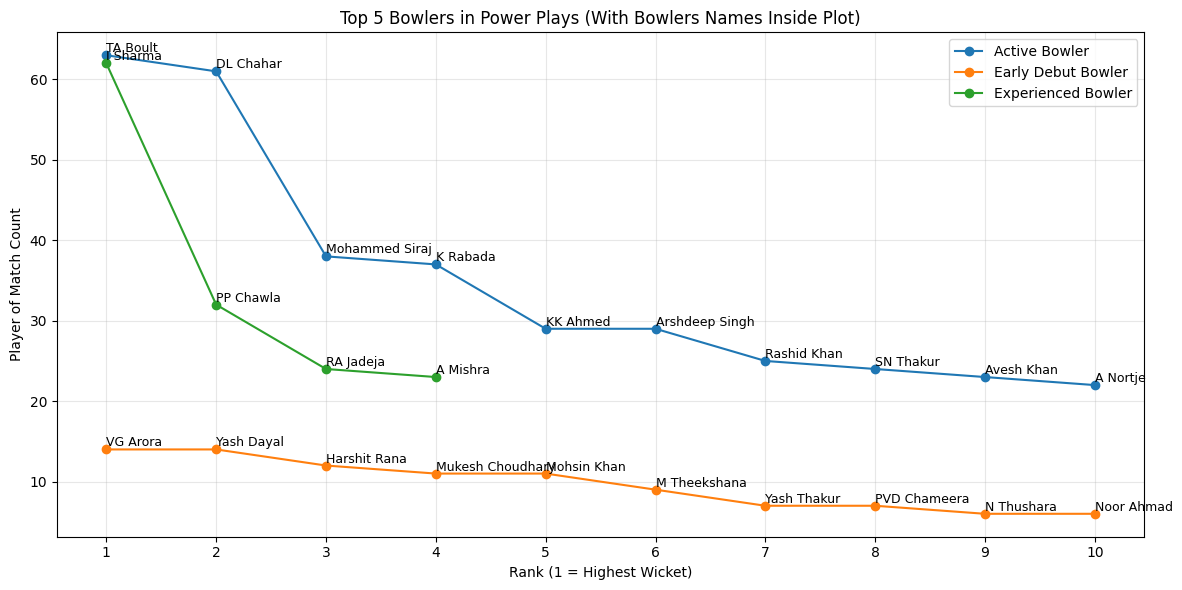

In [71]:
def label_points(ax, x, y, labels):
    for i in range(len(x)):
        ax.text(x[i], y[i], labels[i], fontsize=9, ha='left', va='bottom')

plt.figure(figsize=(12,6))

# Create rank positions 1–5
A = top_5_bowlwer_in_power_plays_A.copy()
D = top_5_bowlwer_in_power_plays_D.copy()
E = top_5_bowlwer_in_power_plays_E.copy()

A['rank'] = range(1, len(A)+1)
D['rank'] = range(1, len(D)+1)
E['rank'] = range(1, len(E)+1)

# Plot the lines
plt.plot(A['rank'], A['is_wicket'], marker='o', label='Active Bowler')
plt.plot(D['rank'], D['is_wicket'], marker='o', label='Early Debut Bowler')
plt.plot(E['rank'], E['is_wicket'], marker='o', label='Experienced Bowler')

# Add batsman names as labels next to each point
ax = plt.gca()
label_points(ax, A['rank'], A['is_wicket'], A['bowler'])
label_points(ax, D['rank'], D['is_wicket'], D['bowler'])
label_points(ax, E['rank'], E['is_wicket'], E['bowler'])

plt.title('Top 5 Bowlers in Power Plays (With Bowlers Names Inside Plot)')
plt.xlabel('Rank (1 = Highest Wicket)')
plt.ylabel('Player of Match Count')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

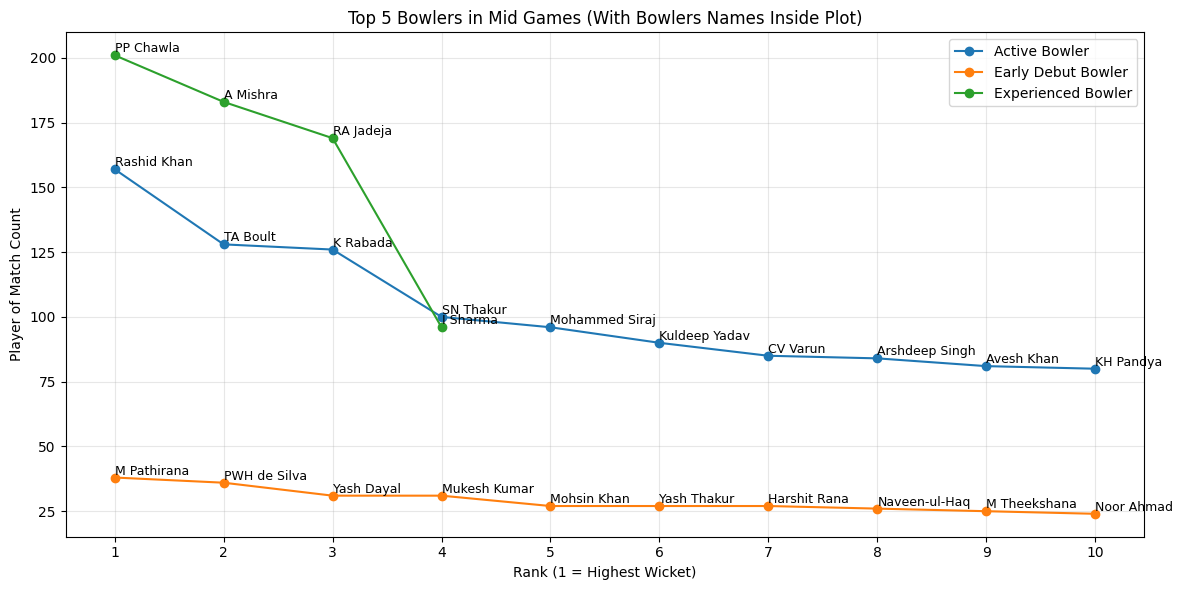

In [74]:
def label_points(ax, x, y, labels):
    for i in range(len(x)):
        ax.text(x[i], y[i], labels[i], fontsize=9, ha='left', va='bottom')

plt.figure(figsize=(12,6))

# Create rank positions 1–5
A = top_5_bowlwer_in_mid_game_A.copy()
D = top_5_bowlwer_in_mid_game_D.copy()
E = top_5_bowlwer_in_mid_game_E.copy()

A['rank'] = range(1, len(A)+1)
D['rank'] = range(1, len(D)+1)
E['rank'] = range(1, len(E)+1)

# Plot the lines
plt.plot(A['rank'], A['is_wicket'], marker='o', label='Active Bowler')
plt.plot(D['rank'], D['is_wicket'], marker='o', label='Early Debut Bowler')
plt.plot(E['rank'], E['is_wicket'], marker='o', label='Experienced Bowler')

# Add batsman names as labels next to each point
ax = plt.gca()
label_points(ax, A['rank'], A['is_wicket'], A['bowler'])
label_points(ax, D['rank'], D['is_wicket'], D['bowler'])
label_points(ax, E['rank'], E['is_wicket'], E['bowler'])

plt.title('Top 5 Bowlers in Mid Games (With Bowlers Names Inside Plot)')
plt.xlabel('Rank (1 = Highest Wicket)')
plt.ylabel('Player of Match Count')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

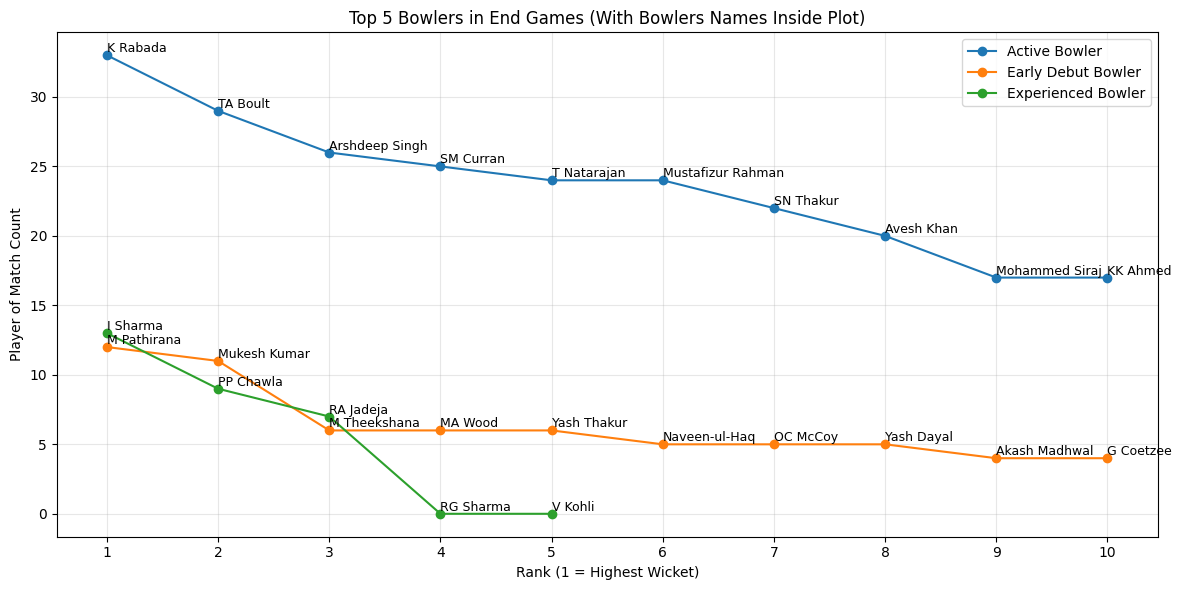

In [75]:
def label_points(ax, x, y, labels):
    for i in range(len(x)):
        ax.text(x[i], y[i], labels[i], fontsize=9, ha='left', va='bottom')

plt.figure(figsize=(12,6))

# Create rank positions 1–5
A = top_5_bowlwer_in_end_game_A.copy()
D = top_5_bowlwer_in_end_game_D.copy()
E = top_5_bowlwer_in_end_game_E.copy()

A['rank'] = range(1, len(A)+1)
D['rank'] = range(1, len(D)+1)
E['rank'] = range(1, len(E)+1)

# Plot the lines
plt.plot(A['rank'], A['is_wicket'], marker='o', label='Active Bowler')
plt.plot(D['rank'], D['is_wicket'], marker='o', label='Early Debut Bowler')
plt.plot(E['rank'], E['is_wicket'], marker='o', label='Experienced Bowler')

# Add batsman names as labels next to each point
ax = plt.gca()
label_points(ax, A['rank'], A['is_wicket'], A['bowler'])
label_points(ax, D['rank'], D['is_wicket'], D['bowler'])
label_points(ax, E['rank'], E['is_wicket'], E['bowler'])

plt.title('Top 5 Bowlers in End Games (With Bowlers Names Inside Plot)')
plt.xlabel('Rank (1 = Highest Wicket)')
plt.ylabel('Player of Match Count')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()